In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

First, a bit on the data itself. The dataset is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Each sample has 30 features and a label indicating whether the sample is malignant or benign. Looking at the data it seems like one can construct a series of nested if-then-else statements. Every sample can then be processed by a decision node to eventually have leaves answering the big question i.e. whether the sample is malignant or benign. The if-then-else structure is more suitable for a Decision tree where each node splits the data ulitmately resolving it to the final label. It might be possible to use a neural network on this dataset but the amount of data is less to get good results from a neural network. Neural network on this dataset might just be an overkill.

In the below experiments we plan to use "entropy" or information gain as the basis of split. SKLEARN DecisionTreeClassifier supports both GINI and entropy but I planned to use entropy because it is easier to form the mental picture thinking in terms of information gain and corelating with what has been taught in class.

In [3]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Decision Tree Classifier

In [4]:
from sklearn.preprocessing import StandardScaler

# Divide data into train, cross validation, test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train_cross, X_test_cross, y_train_cross, y_test_cross = \
    train_test_split(X_train, y_train, random_state=0)

print("y shape", y.shape)
print("y_train_cross shape", y_train_cross.shape)
print("y_test_cross shape", y_test_cross.shape)
np.random.seed(0)

y shape (569,)
y_train_cross shape (319,)
y_test_cross shape (107,)


In [5]:
print("y", y.shape)
print("y_test", y_test.shape)
print("y_train_cross", y_train_cross.shape)
print("y_test_cross", y_test_cross.shape)

y (569,)
y_test (143,)
y_train_cross (319,)
y_test_cross (107,)


#### Model accuracy as func of tree depth

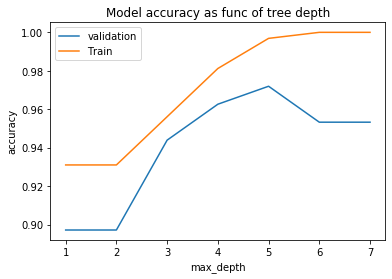

CPU times: user 338 ms, sys: 16.4 ms, total: 355 ms
Wall time: 364 ms


In [6]:
%%time
# training/test performance by controlling as a function of tree depth.
accuracy_val = []
accuracy_train = []

rLow = 1
rHigh = 8
rStep = 1
for i in range(rLow, rHigh, rStep):

    clf = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=i)
    clf.fit(X_train_cross, y_train_cross)
    score = clf.score(X_test_cross, y_test_cross)
    accuracy_val.append(score)
    
    score = clf.score(X_train_cross, y_train_cross)
    accuracy_train.append(score)

x = list(range(rLow, rHigh, rStep))
plt.plot(x, accuracy_val, label="validation")
plt.plot(x, accuracy_train, label="Train")

plt.xticks(x)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title("Model accuracy as func of tree depth")
plt.legend()

plt.show()

The performance on train and test seems to be increasing as the depth of the tree is increased. This makes sense as increasing the max_depth parameters adds more decision nodes and therefore better capable to fit the function. However after depth=5 the test performance falls though the training performance improves. This looks like typical over-fiting case where all the available nodes does a pretty good job in tracking the input vector but loses generalization. For depth >= 6 the tree has got enough decision nodes to follow the training input precisely(accuracy = 1.0) but it lacks performance on the validation data.


#### model learning curve

Test score 0.916083916083916


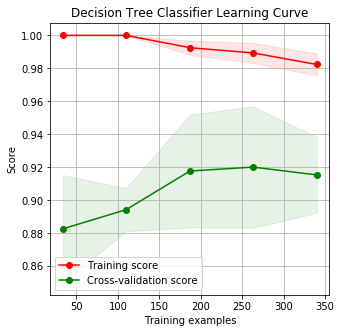

In [9]:
from plot_learning_curve import plot_learning_curve
from plot_learning_curve import plot_fit_time

DTree = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=4)
plot_learning_curve(DTree, "Decision Tree Classifier Learning Curve", X_train, y_train)

# clf = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=5)
# DTree.fit(X_train_cross, y_train_cross)
# score = DTree.score(X_test_cross, y_test_cross)
# print("validation score", score)

DTree.fit(X_train_cross, y_train_cross)
score = DTree.score(X_test, y_test)
print("Test score", score)

From the learning curve plot above, it can be seen that the cross validation score increases steadily as the training score increases with the number of training examples. This is expected as with low number of training examples and at tree depth = 4 the training data is memorized, that is reflected by perfect training accuracy when samples are 50. When training samples are increased we see an increase in the test accuracy because the model is acquiring more information from the new training data.

Validation score of 0.92 matches close to the test set accuracy, which is ~0.92. However we do see high variance between training and CV scores. The model seems to have trained well enough on the traing data as can be observed by high score but it is unable to genralize over the CV set. We have reduced the error margin by pre-prunning the tree but that might not be enough. Perhaps we should try other pruning methods like ccp_alpha to reduce the variance. 

#### Model performance on split ratio

(383,) (43,)
(362,) (64,)
(340,) (86,)
(319,) (107,)
(298,) (128,)
(276,) (150,)
(255,) (171,)
(234,) (192,)
5


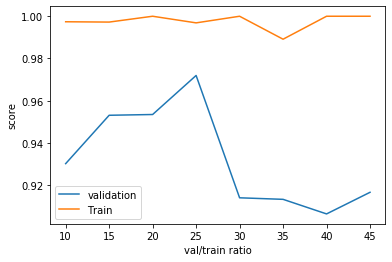

CPU times: user 335 ms, sys: 13.1 ms, total: 348 ms
Wall time: 347 ms


In [11]:
%%time
# model performance playing with train/cross ratio.

accuracy_val = []
accuracy_train = []

for i in range(10, 50, 5):
    X_train_cross, X_test_cross, y_train_cross, y_test_cross = \
        train_test_split(X_train, y_train, test_size = i*0.01, random_state=0)
    print(y_train_cross.shape, y_test_cross.shape)

    clf = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=5)
    clf.fit(X_train_cross, y_train_cross)
    score = clf.score(X_test_cross, y_test_cross)
    accuracy_val.append(score)
    
    score = clf.score(X_train_cross, y_train_cross)
    accuracy_train.append(score)
depth = clf.tree_.max_depth
print(depth)

x = list(range(10, 50, 5))
plt.plot(x, accuracy_val, label="validation")
plt.plot(x, accuracy_train, label="Train")

plt.xticks(x)
plt.xlabel('val/train ratio')
plt.ylabel('score')
plt.legend()

plt.show()

Playing with the validation/train ratio shows the above graph. Keeping tree depth = 5 and at 10% split, validation score is low 0.93 whereas the training score is 1.0. We already observed from previous experiment that tree depth=5 is enough to capture the whole data which seems to be the case here as well as explained by perfect train score. However, the tree is over-fiting the data and that explains low validation score.

As the val/train split increases the training samples are reduced and the tree gets less oppurtunity to fit the training data. This indirectly helps in generalizing which is reflected in better validation score. However after 25% split there isn't enough data to learn the features and that is reflected by the fall in the validation score.

#### Model fitting time relation with number of train samples

<module 'matplotlib.pyplot' from '/Users/Rudrajit/miniconda3/envs/ai_env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

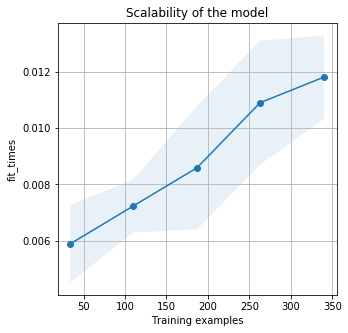

In [48]:
DTree = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=4)
plot_fit_time(DTree, "Decision Tree Classifier Fitting time Curve", X_train, y_train)

The plot show the time required by the model to train with various sizes of training dataset. We can observe that the fit time increases as new samples are added, which is expected with Decision Trees as there is no parallelization. Decision trees are quite fast. To train on 350 samples it took about 7ms. In the above experiment we used max_depth as the pruning method and restricted the tree expansion to level 4. Restricting the tree depth to a max_depth helps by not making the extra decision nodes that would otherwise exist to fit the train data to best extent.

#### Model performance as function of max_features

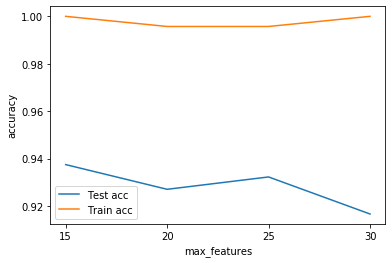

In [14]:
accuracy_train = []
accuracy_test = []
clf = None

for i in range(15, 35, 5):
    clf = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_features=i, max_depth=5)
    clf.fit(X_train_cross, y_train_cross)

    score = clf.score(X_train_cross, y_train_cross)
    accuracy_train.append(score)
    
    score = clf.score(X_test_cross, y_test_cross)
    accuracy_test.append(score)

x = list(range(15, 35, 5))
plt.plot(x, accuracy_test, label="Test acc")
plt.plot(x, accuracy_train, label="Train acc")

plt.xticks(x)
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.legend()

plt.show()

With depth fixed to 5 we vary the max_features used to split on. As the max_features increases we see the validation set accuracy also increases which is expected because with increasing features we are incorporating more information from the dataset to make the decision thereby making better decisions. Training accuracy remains more or less same.

# KNN classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier

#### Model complexity and impact on performance

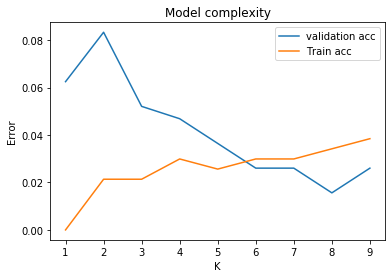

CPU times: user 589 ms, sys: 10.1 ms, total: 599 ms
Wall time: 601 ms


In [16]:
%%time
# training/test performance as a funct of K.
accuracy_test = []
accuracy_train = []

for i in range(1, 10):
#     print(y_train_cross.shape, y_test_cross.shape)

    clf = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2, weights='uniform')
    clf.fit(X_train_cross, y_train_cross)
    
    score = clf.score(X_train_cross, y_train_cross)
    accuracy_train.append(1-score)
    
    score = clf.score(X_test_cross, y_test_cross)
    accuracy_test.append(1-score)

x = list(range(1, 10))
plt.plot(x, accuracy_test, label="validation acc")
plt.plot(x, accuracy_train, label="Train acc")

plt.xticks(x)
plt.xlabel('K')
plt.ylabel('Error')
plt.title("Model complexity")
plt.legend()

plt.show()

In the above experiment we are varying the K of kNN from 1 to 9. While we do that the basis of measurement is kept fixed as uniform, meaning all the neighbors have equal "say" in deciding the ouput for a particular node. Also we set the p=2 for using euclidean measure across the experiments.

First, a word on execution time. Overall 9 runs took 657ms wall time, which would mean ~73ms each loop. Apparently kNN takes lonnger to train and predict when compared to Decision Trees.

Looking at the validation set accuracy scores, as K increases the accuracy too increases up until k=6, after which there is a fall in validation accuracies. This is because, as k increases we are adding more neighbors to base our decision on, which means for a node to output postive majority of neighbors needs to vote positive. At lower K values, especially in the 'uniform' model there isn't sufficient nodes to make the right decision. The situation improves as k increases.
However as K increases more and more the decision boundary becomes smoother and after a point it loses the capibility to generalize on the validation set, therefore the validation accuracy falls.

For training set at K=1 which is a complex model will always give 100% accuracy as the decision is just based on the data point itself. However as K increases we tend to make the decision based on multiple neighbors and given this is 'uniform' model far off neighbors may vote completely oppsite of the true label. Adding more neighbors (increasing K) compounds this issue where far off votes are not representative of the data point and this brings down the accuracy of prediction for the data point.

We can also notice that reducing the model complexity (k>6) will shift the model to High Bias region, where as reducing the complexity (k<6) would drag the model into High Variance region.

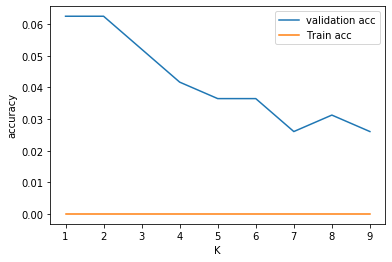

CPU times: user 413 ms, sys: 8 ms, total: 421 ms
Wall time: 419 ms


In [17]:
%%time
# training/test performance as a funct of K.
accuracy_test = []
accuracy_train = []

for i in range(1, 10):
#     print(y_train_cross.shape, y_test_cross.shape)

    clf = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2, weights='distance')
    clf.fit(X_train_cross, y_train_cross)
    
    score = clf.score(X_train_cross, y_train_cross)
    accuracy_train.append(1- score)
    
    score = clf.score(X_test_cross, y_test_cross)
    accuracy_test.append(1-score)

x = list(range(1, 10))
plt.plot(x, accuracy_test, label="validation acc")
plt.plot(x, accuracy_train, label="Train acc")

plt.xticks(x)
plt.xlabel('K')
plt.ylabel('accuracy')
plt.legend()

plt.show()

The same experiment of varying K from 1 to 10, thereby reducing the model complexity is carried out in the above section. The model 'weight' parameters is selected to be 'distance', meaning nearby neighbors have more 'say' in the decision process than the far off ones.

Firstly, we see the training score is perfect 1.0 for all values of K. This is expected because in weighted distance model the data point itself has the highest 'say' on the output. Also there are more chances that the nearby nodes have the same label as the data point, therefore their votes match the true label.

Overall the validation set curve matches that of 'uniform' model but the peak performance is better. I would expect this anyway because in this case the nearest matching training sample would have highest 'say' on the decision. Also the adverse effect of far off unrelated nodes would be reduced proportionately to their distance from the data point. That said, we still see the performance on validation reduces as K increases beyond a point, probably because as K increases the model complexity reduces and the decision boundary smoothens. A smooth decision boundary would not be able to match all the data points and as outliers increases accuracy decreases.

#### kNN Learning curve

Test score 0.9440559440559441


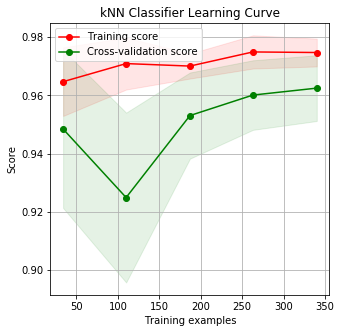

In [18]:
from plot_learning_curve import plot_learning_curve
from plot_learning_curve import plot_fit_time

kNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2, weights='uniform')
plot_learning_curve(kNN, "kNN Classifier Learning Curve", X_train, y_train)

kNN.fit(X_train_cross, y_train_cross)
score = kNN.score(X_test, y_test)
print("Test score", score)

From the above learning plot curve we see train score is ~0.97, CV is ~0.96 and Test is 0.94. We can observe that even for very low sample size training error is not 0, this is because we have n_neighbors = 5 and all the 5 are uniformly voting for the decision on the data point.
That said, we can see steady increase in the CV score when the number of samples > 100. This too is expected because as we add more data keeping the model complexity fixed, it will acquire learning untill saturated at which point it would start over-fitting.


#### Model performance on split ratio

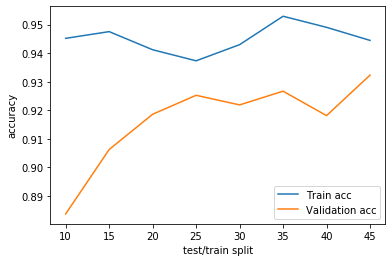

CPU times: user 667 ms, sys: 9.5 ms, total: 676 ms
Wall time: 678 ms


In [19]:
%%time
# model performance playing with train/cross ratio.

accuracy_val = []
accuracy_train = []

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for i in range(10, 50, 5):
    X_train_cross, X_test_cross, y_train_cross, y_test_cross = \
        train_test_split(X_train, y_train, test_size = i*0.01, random_state=0)

    clf = KNeighborsClassifier(n_neighbors = 5,  metric = 'minkowski', p = 2)
    clf.fit(X_train_cross, y_train_cross)
    score = clf.score(X_test_cross, y_test_cross)
    accuracy_val.append(score)
    
    score = clf.score(X_train_cross, y_train_cross)
    accuracy_train.append(score)

x = list(range(10, 50, 5))
plt.plot(x, accuracy_train, label="Train acc")
plt.plot(x, accuracy_val, label="Validation acc")

plt.xticks(x)
plt.xlabel('test/train split')
plt.ylabel('accuracy')
plt.legend()

plt.show()

Training accuracy starts high at 94% at 10% split ratio but not 1.0. Since this is configured as 'uniform' weights model so far off and nearby votes does not allow the train accuracy to be perfect 1.0 instead defined by collection of k votes with equal 'say' on the decision.

The initial validation accuracy at 10% split shows signs of over fitting where the model is beleiving too strongly on the training data. As the split ratio increases the test accuracy improves as there is less scope to specialize on the train data.

#### Model fitting time relation with number of train samples

<module 'matplotlib.pyplot' from '/Users/Rudrajit/miniconda3/envs/ai_env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

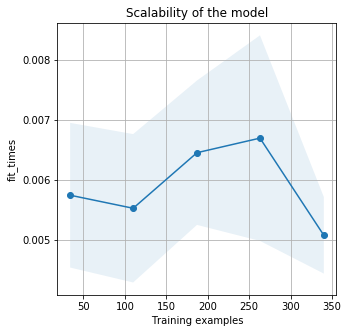

In [20]:
np.random.seed(0)
kNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2, weights='uniform')
plot_fit_time(kNN, "kNN Classifier Fitting Time Curve", X_train, y_train)

The plot show the time required by the model to train with various sizes of training dataset. We can observe that the fit time increases as new samples are added, which is expected with kNN as there is no parallelization. 

It is also noticeable that kNN are more exhaustive than DecisionTress. Over the range of 50 - 350 sample Decision Trees took 2-8 ms whereas kNN took 50-70 ms over the same range of data points.

Restricting the n_neighbors definitely impacts on the time taken as increasing neighbor would mean more exhaustive search and compute.

# Boosting

In [21]:
from sklearn.ensemble import AdaBoostClassifier

In [22]:
## split into cross-validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_cross, X_test_cross, y_train_cross, y_test_cross = \
    train_test_split(X_train, y_train, random_state=0)

#### Model error as a function of number of weak classifiers ensemble.

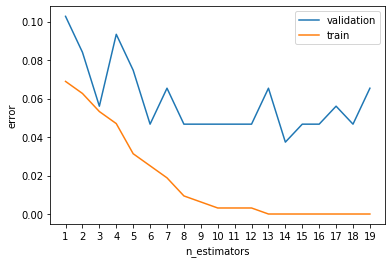

In [23]:
# Effect of n_estimators
acc_val = []
acc_train = []
rLow = 1
rHigh = 20
rStep = 1
for i in range(rLow, rHigh, rStep):
    clf = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=1),
                              n_estimators=i, random_state=0)
    clf.fit(X_train_cross, y_train_cross)

    score = clf.score(X_train_cross, y_train_cross)
    acc_train.append(1-score)

    score = clf.score(X_test_cross, y_test_cross)
    acc_val.append(1-score)

x = list(range(rLow, rHigh, rStep))
plt.plot(x, acc_val, label="validation")
plt.plot(x, acc_train, label="train")

plt.xticks(x)
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()

plt.show()

From the above plot we can see the model starts with high bias as n_estimators=1, which would basically be a weak classifier. As the n_estimators increase AdaBoost improves the performance training repeatedly on the failing data points along with others. We can see the CV score plateus in the middle region as the model learns to generalize on the data points. As n_estimators increases towards the right of the plot the model shifts to high variance zone where the training score continues to improve but the CV error rises as with too many estimators the model can no longer genralize well. The optimum n_estimators would be the middle region where the model has plateau.

#### Effect of learning rate on AdaBoost

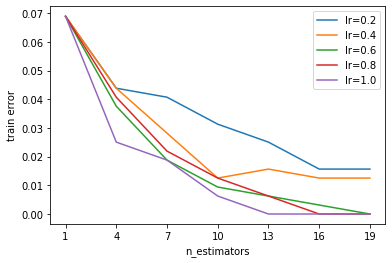

In [24]:
# Lets first see what is the accuracy without the Adaboost.
# Effect of n_estimators
acc_val = []
acc_train = []
rLow = 1
rHigh = 20
rStep = 3
lr = [0.2, 0.4, 0.6, 0.8, 1.0]

for index in range(len(lr)):
    acc_train.append([])
    for i in range(rLow, rHigh, rStep):
        clf = None
        clf = AdaBoostClassifier(DecisionTreeClassifier(random_state=0, max_depth=1),
                                  n_estimators=i, random_state=0, learning_rate=lr[index])
        clf.fit(X_train_cross, y_train_cross)

        score = clf.score(X_train_cross, y_train_cross)
        acc_train[index].append(1-score)

x = list(range(rLow, rHigh, rStep))
for index in range(len(lr)):
    plt.plot(x, acc_train[index], label="lr="+str(lr[index]))

plt.xticks(x)
plt.xlabel('n_estimators')
plt.ylabel('train error')
plt.legend()

plt.show()

We observe the effect of learning rate on training error over a range of n_estimators. We notice that learning rate controls the slope of the curve. For e.g. at n_estimators=4, the error drops sharply for lr=1.0 as compared to lr=0.2(drops gently). Similarly we can see that for n_estimators = 19, the error drop is steep for lr=1.0 than lr=0.2. This is expected because there is a tradeoff between n_estimators and how much we are going to contribute with the new model to the existing one(learning rate). When lr is less, the contribution is less and therefore it takes more n_estimators for same drop in error as compared to higher learning rate.

#### Adaptive Boosting Learning Curve n_estimators=2

Test score 0.8951048951048951


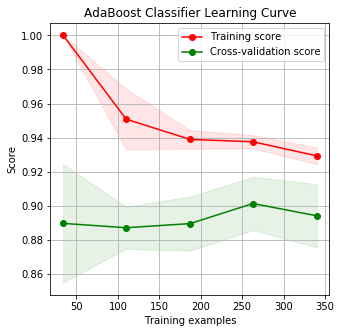

In [25]:
from plot_learning_curve import plot_learning_curve
from plot_learning_curve import plot_fit_time

ada = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=1)
                         ,n_estimators=2,random_state=0)
plot_learning_curve(ada, "AdaBoost Classifier Learning Curve", X_train, y_train)

ada.fit(X_train_cross, y_train_cross)
score = ada.score(X_test, y_test)
print("Test score", score)

#### Adaptive Boosting Learning Curve n_estimators=10

Test score 0.951048951048951


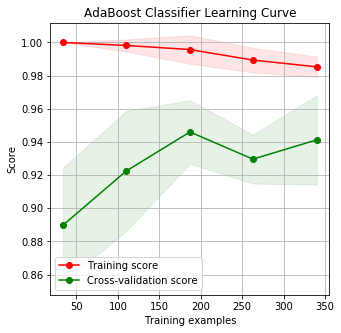

In [26]:
from plot_learning_curve import plot_learning_curve
from plot_learning_curve import plot_fit_time

ada = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=1)
                         ,n_estimators=10,random_state=0)
plot_learning_curve(ada, "AdaBoost Classifier Learning Curve", X_train, y_train)

ada.fit(X_train_cross, y_train_cross)
score = ada.score(X_test, y_test)
print("Test score", score)

When we compare the training scores for n_estimators=2 vs n_estimators=10 especially when the sample size is less than 100, we see the chances of overfitting are more when n_estimators increases for the same sample size and same tree depth of weak classifiers. I would think this is happening because the when n_estimators grows we are doing more iterations feeding in the failed samples and eventually the model masters them and memorizes thereby giving perfect score on train data, though it loses generalization in the process.

We can see there is trend of convergence of training and CV scores as training examples are increased. This is expected becuase as training data grows the model learns new patterns from the new data thereby improving its overall score. Also training score reduces because the effect of memorizing data is offset by addtional training samples.

As explained in the model complexity analysis the model shifts from high bias region to high variance when estimators are increased. We can see that when learning curves for n_estimators=2 is compared with n_estimators=10. As the n_estimators increase AdaBoost improves the performance by training repeatedly on the failing data points along with others.

#### Model fitting time relation with number of train samples

<module 'matplotlib.pyplot' from '/Users/Rudrajit/miniconda3/envs/ai_env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

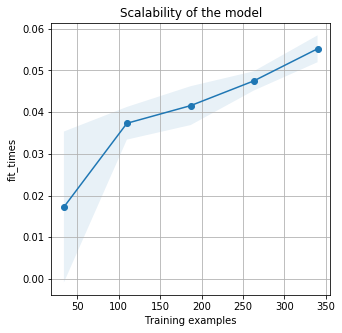

In [27]:
np.random.seed(0)

ada = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=1)
                         ,n_estimators=10,random_state=0)
plot_fit_time(ada, "AdaBoost Classifier Fitting Time Curve", X_train, y_train)

It can be easily seen that Adaboost is more exhaustive than DecisionTree itself as it is an ensemble of n_estimators together. Also we see it is more exhaustive than kNN classifier. The above plot is for n_estimators=10. We would expect these numbers to go higher as n_estimators increases.

#### Model accuracy as a function of tree depth of the weak classifiers.

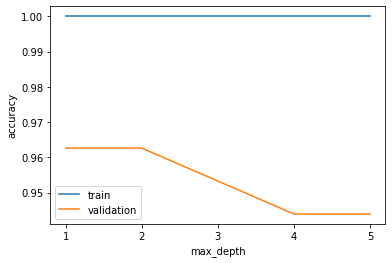

In [28]:
# Accuracy of boosting model as a function of Classifier's tree depth
acc_test = []
acc_train = []
rLow = 1
rHigh = 6
rStep = 1
for i in range(rLow, rHigh, rStep):
    clf = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=i),
                          n_estimators=200, random_state=0)
    clf.fit(X_train_cross, y_train_cross)

    score = clf.score(X_train_cross, y_train_cross)
    acc_train.append(score)

    score = clf.score(X_test_cross, y_test_cross)
    acc_test.append(score)

    score = clf.score(X_test, y_test)
    
x = list(range(rLow, rHigh, rStep))
plt.plot(x, acc_train, label="train")
plt.plot(x, acc_test, label="validation")

plt.xticks(x)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

plt.show()    

We also see that the overall accuracy of the boosting is a function of tree depth of the constituent classifiers as well. Normally with individual classifiers we have observed that the accuracy increases with depth, as more depth leads to more decision nodes. However in this case we observe increase in depth is actually impacting the overall accuracy negatively. With increasing tree depth we are also specializing on the training data and carrying forward the noise from the training data. This noise gets compounded as well over the iterations of the boosting algorithm leading to the degradation of the overall accuracy.

# Neural Network Classifier

In [31]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras import backend as K
import numpy as np

Using TensorFlow backend.


#### Effect of epochs on train/validation data

In [32]:
# Divide data into train, validation and test sets.
X_train_cross, X_test_cross, y_train_cross, y_test_cross = \
    train_test_split(X_train, y_train, random_state=0)

In [33]:
print(X_train.shape[1])
np.random.seed(0)

30


In [34]:
# model architecture
classifier = Sequential() 
classifier.add(Dense(units = 24, activation = 'relu', input_dim = X_train.shape[1], kernel_initializer='random_uniform'))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 12, activation = 'relu', kernel_initializer='random_uniform'))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer='random_uniform'))
classifier.compile(optimizer = RMSprop(), loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                744       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = classifier.fit(X_train_cross, y_train_cross, validation_data = 
                         (X_test_cross,y_test_cross), epochs=100, batch_size=100, shuffle=False, verbose=0)
print(K.eval(classifier.optimizer.lr))

0.001


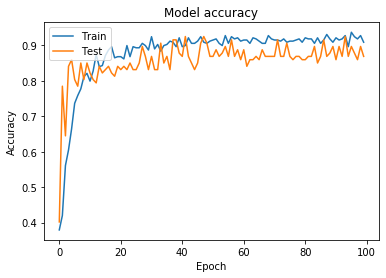

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

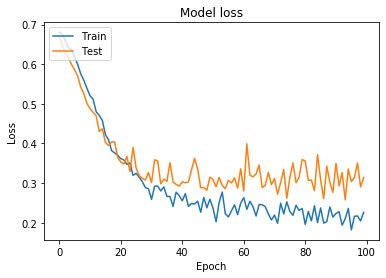

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

We see as Epoch increases both training and validation loss decreases steadily. After about 50 epochs we see the training error falling but the validation error seems to be increasing as the model starts overfiting. For the given data set training should stop at about 50 epochs after which the model starts acquiring the training data noise as well.

### Experiments with learning rate

In [49]:
# model architecture
def create_model(lr):
    K.clear_session()
    np.random.seed(0)
    classifier = Sequential() 
    classifier.add(Dense(units = 24, activation = 'relu', input_dim = X_train.shape[1], kernel_initializer='random_normal'))
    classifier.add(Dropout(0.2))

    classifier.add(Dense(units = 12, activation = 'relu', kernel_initializer='random_normal'))
    classifier.add(Dropout(0.2))

    classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer='random_normal'))
    classifier.compile(optimizer = RMSprop(lr=lr), loss = 'binary_crossentropy', metrics = ['accuracy'])
#     classifier.summary()
    return classifier

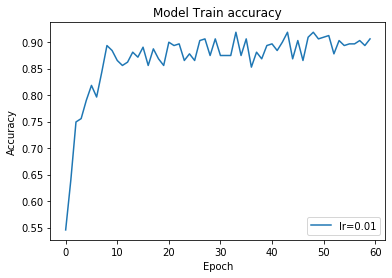

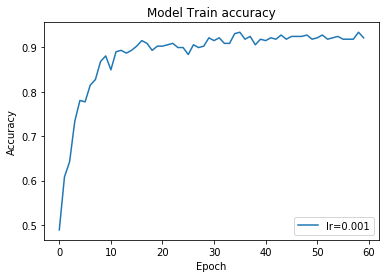

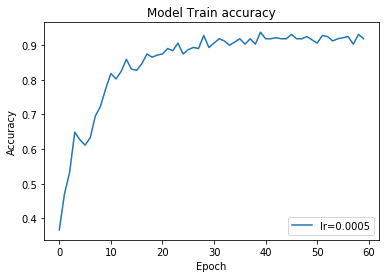

In [53]:
lr = [1E-2, 1E-3, 5E-4]

for index in range(len(lr)):
    clf = None
    clf = create_model(lr[index])

    history = clf.fit(X_train_cross, y_train_cross, validation_data = 
                     (X_test_cross,y_test_cross), epochs=60, shuffle=False, verbose=0)
    plt.plot(history.history['accuracy'])

    plt.title('Model Train accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['lr='+str(lr[index])], loc='lower right')
    plt.show()

As we can see from the above plots learning rate effects the number of epochs consumed to reach a certain accuracy. It is infact the factor by which the model allows change in the weights and in turn effect the amount of learning from epoch to epoch. For e.g. when the lr=1E-2 it took less than 10 epochs to reach accuracy 0.9, whereas it took about 40 epochs when the lr=5E-4.

#### Model performance on test set

In [40]:
## split into cross-validation set
X_train_cross, X_test_cross, y_train_cross, y_test_cross = \
    train_test_split(X_train, y_train, random_state=0)

In [44]:
K.clear_session()
np.random.seed(0)
classifier = Sequential() 
classifier.add(Dense(units = 24, activation = 'relu', input_dim = X_train.shape[1], kernel_initializer='random_normal'))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 12, activation = 'relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer = RMSprop(), loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                744       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [45]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
history = classifier.fit(X_train_cross, y_train_cross, validation_data = 
                         (X_test_cross,y_test_cross), epochs=300, callbacks=[callback], shuffle=False, verbose=0)
scores = clf.evaluate(X_train_cross, y_train_cross, verbose=0)
print("Train %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

scores = classifier.evaluate(X_test_cross, y_test_cross, verbose=0)
print("Validation %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

scores = classifier.evaluate(X_test, y_test, verbose=0)
print("Test %s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

Train accuracy: 92.79%
Validation accuracy: 85.98%
Test accuracy: 94.41%


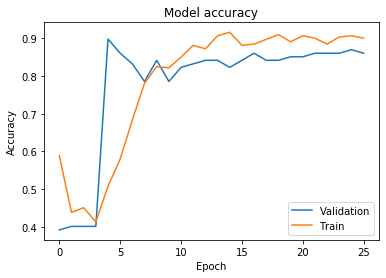

In [46]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation','Train'], loc='lower right')
plt.show()

We see steady rise in accuracy as epoch increases which is expected as with every epoch we are learning a bit from the data. After about 25 epochs there is no significant increase in the CV accuracy and the "Early Stopping" kicks in stopping the iterations. If we were to continue iterations we would see the model over-fitting which would result in continued increase in the training accuracy but degradation in the CV accuracy.

# Support Vector Machines

In [54]:
from sklearn.svm import SVC

In [55]:
## split into cross-validation set
X_train_cross, X_test_cross, y_train_cross, y_test_cross = \
    train_test_split(X_train, y_train, random_state=0)

Test score 0.958041958041958


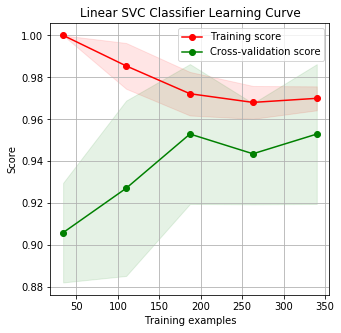

In [56]:
from plot_learning_curve import plot_learning_curve
from plot_learning_curve import plot_fit_time

svcLin = SVC(kernel = 'linear', random_state = 0, verbose=False)
plot_learning_curve(svcLin, "Linear SVC Classifier Learning Curve", X_train, y_train)

svcLin.fit(X_train_cross, y_train_cross)
score = svcLin.score(X_test, y_test)
print("Test score", score)

Test score 0.9230769230769231


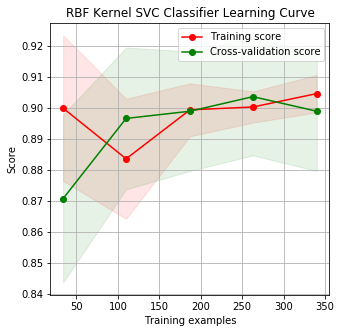

In [57]:
from plot_learning_curve import plot_learning_curve
from plot_learning_curve import plot_fit_time

svcRbf = SVC(kernel = 'rbf', random_state = 0, verbose=False)
plot_learning_curve(svcRbf, "RBF Kernel SVC Classifier Learning Curve", X_train, y_train)

svcRbf.fit(X_train_cross, y_train_cross)
score = svcRbf.score(X_test, y_test)
print("Test score", score)